tokenizing - word tokenizers, sentence tokenizers

lexicon and corporas. （词库和语料库） 

corparas - body of text. ex: medical journals, presidential speeches

lexicon - words and their means

stop word -- 'is', 'a', 'the'

stem ---  working -> work

lemmatizing ---   increases -> increase

speech tagging  --- VB, NNP, ...   https://www.nltk.org/book/ch05.html

chunking

chinking

nltk.corpus  文集

wordnet   查看单词含义，示例，同义词，反义词

text classfication

In [8]:
from nltk.corpus import wordnet as wn
panda = wn.synset('panda.n.01')
hyper = lambda s : s.hypernyms()
list(panda.closure(hyper))

%matplotlib inline
import matplotlib

In [12]:
# 抓取数据
from bs4 import BeautifulSoup
import urllib.request
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)

tokens = [t for t in text.split()]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

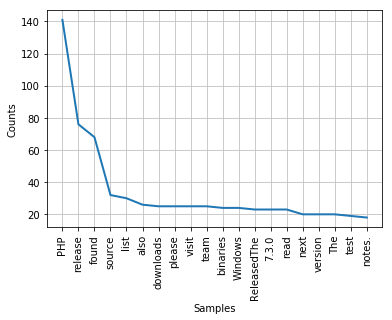

In [24]:
# remove stop word
from nltk.corpus import stopwords

clean_tokens = tokens[:]
 
sr = stopwords.words('english')
print(sr)
 
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
freq.plot(20, cumulative=False)

In [15]:
# tokenize with nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
 
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(sent_tokenize(mytext))
print(word_tokenize(mytext))


['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']
['Hello', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


In [18]:
# 查单词
from nltk.corpus import wordnet
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())
 
syn = wordnet.synsets("NLP") 
print(syn[0].definition())
syn = wordnet.synsets("Python")
print(syn[0].definition())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']
the branch of information science that deals with natural language information
large Old World boas


In [19]:
# 同义词
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
 
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


In [20]:
# 反义词
antonyms = []
for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
 
print(antonyms)

['large', 'big', 'big']


In [44]:
# 两个词的相似性
w1 = wn.synset("ship.n.01")
w2 = wn.synset("boat.n.01")
print(w1.wup_similarity(w2))

0.9090909090909091


In [21]:
# word stemming
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('working'))

work


In [23]:
# lemmatizing
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('increases'))


increase


In [31]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [36]:
# speeching tagging
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(sample_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
#             print(i)
#             print ("-------------")
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
#             副词，动词，名词
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP><NN>}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
#             chunked.draw()

    except Exception as e:
        print(str(e))
        
process_content()

PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION
 
January 31, 2006

THE PRESIDENT: Thank you all.
-------------
Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.
-------------
Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.
-------------
(Applause.)
-------------
President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan. 31, 2006. White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together.
-------------
We have gathered under this Capitol dome in moments o

Laura Bush is applauded as she is introduced Tuesday evening, Jan. 31, 2006 during the State of the Union Address at United States Capitol in Washington.
-------------
White House photo by Eric Draper Our men and women in uniform are making sacrifices -- and showing a sense of duty stronger than all fear.
-------------
They know what it's like to fight house to house in a maze of streets, to wear heavy gear in the desert heat, to see a comrade killed by a roadside bomb.
-------------
And those who know the costs also know the stakes.
-------------
Marine Staff Sergeant Dan Clay was killed last month fighting in Fallujah.
-------------
He left behind a letter to his family, but his words could just as well be addressed to every American.
-------------
Here is what Dan wrote: "I know what honor is.
-------------
...
-------------
It has been an honor to protect and serve all of you.
-------------
I faced death with the secure knowledge that you would not have to....
-------------
Never f

We hear claims that immigrants are somehow bad for the economy -- even though this economy could not function without them.
-------------
(Applause.)
-------------
All these are forms of economic retreat, and they lead in the same direction -- toward a stagnant and second-rate economy.
-------------
Tonight I will set out a better path: an agenda for a nation that competes with confidence; an agenda that will raise standards of living and generate new jobs.
-------------
Americans should not fear our economic future, because we intend to shape it.
-------------
Keeping America competitive begins with keeping our economy growing.
-------------
And our economy grows when Americans have more of their own money to spend, save, and invest.
-------------
In the last five years, the tax relief you passed has left $880 billion in the hands of American workers, investors, small businesses, and families -- and they have used it to help produce more than four years of uninterrupted economic growt

Preparing our nation to compete in the world is a goal that all of us can share.
-------------
I urge you to support the American Competitiveness Initiative, and together we will show the world what the American people can achieve.
-------------
America is a great force for freedom and prosperity.
-------------
Yet our greatness is not measured in power or luxuries, but by who we are and how we treat one another.
-------------
So we strive to be a compassionate, decent, hopeful society.
-------------
In recent years, America has become a more hopeful nation.
-------------
Violent crime rates have fallen to their lowest levels since the 1970s.
-------------
Welfare cases have dropped by more than half over the past decade.
-------------
Drug use among youth is down 19 percent since 2001.
-------------
There are fewer abortions in America than at any point in the last three decades, and the number of children born to teenage mothers has been falling for a dozen years in a row.
----------

In [60]:
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
# print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words)
# print(all_words.most_common(15))
# print(all_words["stupid"])

In [61]:
word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features
# print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [62]:
training_set = featuresets[:1900]   #1900
testing_set = featuresets[1900:]    #100
len(testing_set)

classifier = nltk.NaiveBayesClassifier.train(training_set)

print("navie bayes algo accuracy:", 
      (nltk.classify.accuracy(classifier, testing_set)))
classifier.show_most_informative_features(15)

navie bayes algo accuracy: 0.76
Most Informative Features
                 conveys = True              pos : neg    =      9.5 : 1.0
                   dread = True              pos : neg    =      8.9 : 1.0
                     ivy = True              neg : pos    =      7.1 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
                   tracy = True              pos : neg    =      6.9 : 1.0
              unbearable = True              neg : pos    =      6.3 : 1.0
                   sweep = True              pos : neg    =      6.2 : 1.0
                 existed = True              pos : neg    =      6.2 : 1.0
                   terri = True              neg : pos    =      5.8 : 1.0
                  venice = True              pos : neg    =      5.6 : 1.0
             fulfillment = True              pos : neg    =      5.6 : 1.0
                    wits = True              pos : neg    =      5.6 : 1.0
              astronomer = True           

In [65]:
import pickle
# save
save_classifier = open("naviebayes.pickle", "wb")
pickle.dump(classifier, save_classifier)

# load  pickle.load() 

In [73]:
from nltk.classify.scikitlearn import SklearnClassifier
import sklearn
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC


MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set)))

MNB_classifier accuracy percent: 0.75


In [70]:
# GaussianNB_classifier = SklearnClassifier(GaussianNB())
# GaussianNB_classifier.train(training_set)
# print("GaussianNB_classifier accuracy percent:", (nltk.classify.accuracy(GaussianNB_classifier, testing_set)))

In [71]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set)))

BernoulliNB_classifier accuracy percent: 0.77


In [77]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set)))

SGD_classifier = SklearnClassifier(SGDClassifier())
SGD_classifier.train(training_set)
print("accuracy percent:", (nltk.classify.accuracy(SGD_classifier, testing_set)))

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set)))

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set)))

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set)))

/Users/chenminhua/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy percent: 0.73


/Users/chenminhua/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


accuracy percent: 0.77


/Users/chenminhua/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy percent: 0.43
accuracy percent: 0.76
accuracy percent: 0.71


In [79]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [83]:
voted_classifier = VoteClassifier(classifier, 
                                  MNB_classifier, 
                                  BernoulliNB_classifier,
                                 LogisticRegression_classifier,
                                 SGD_classifier,
                                 LinearSVC_classifier, 
                                  NuSVC_classifier)
print("voted classifier accuracy: ", (nltk.classify.accuracy(voted_classifier, testing_set)))



voted classifier accuracy:  0.76


In [87]:
print("classification", voted_classifier.classify(testing_set[0][0]), "confidence %:", 
      voted_classifier.confidence(testing_set[2][0]))
print(testing_set[2][0])

classification neg confidence %: 1.0
{'ulation': False, 'conciousness': False, 'aka': False, 'hui': False, 'naughty': False, 'tune': False, 'caverns': False, 'stoicism': False, 'mouse': False, 'sena': False, 'blimp': False, 'floppy': False, 'solutions': False, 'twisty': False, 'repression': False, 'heslop': False, 'strom': False, 'colonel': False, 'pushy': False, 'chuckles': False, 'indescribable': False, 'goodnight_': False, 'zzzzzzz': False, 'aussie': False, 'crony': False, 'obtain': False, 'handphone': False, 'faded': False, 'natalie': False, 'thoughtlessly': False, 'freebie': False, 'topless': False, 'yielded': False, 'colony': False, 'protesting': False, '00s': False, 'fishing': False, 'heralding': False, 'leary': False, 'payroll': False, 'zemecki': False, 'dogg': False, 'los': False, 'tawdriness': False, 'ascends': False, 'emporer': False, 'cia': False, 'footnote': False, 'straw': False, 'preston': False, 'favor': False, 'verite': False, 'majesty': False, 'divest': False, 'hypnot